# Writing numbers on computers

Computers are base 2 machines, they just understand 0's and 1's and can perform operations on them. In this notebook we will show how computers can handle integers and real numbers. We will answer questions like

* How does a computer write the natural number like 1987
* How a computer can represent a fraction number like 5/4=1.25
* How can we represent (if that's even possible) an irrational like $\pi$ number

Let's start with integers

## Integers

Calculations on integers are "easy" on a computer, just think on summing two integers or subtracting another two. Normally you represent integers internally with a string of bits so in languages like C there are types like **int** (4 bytes) or **long** (8 bytes)

For a signed integer the ranges are from 

$$-2^{8b-1}$$

to 

$$2^{8b-1}$$

where $b$ is the number of bytes of the type. Recall that for 4 bytes we have a string of 0's and 1's of lenght 8*4=32 but we have to take out one bit that accounts for the sing. For instance, for 4 byte intenger the ranges are:

In [1]:
print(f"An signed 4 byte int ranges from {-2**(4*8-1)} to {2**(4*8-1)-1}")

An signed 4 byte int ranges from -2147483648 to 2147483647


In [2]:
print(f"An unsigned 4 byte int ranges from 0 to {2**(4*8)-1}")
print(f"A long signed 8 byte int ranges from {-2**(8*8-1)} to {2**(8*8-1)-1}")
print(f"A long unsigned 8 byte int ranges from {0} to {2**(8*8)-1}")

An unsigned 4 byte int ranges from 0 to 4294967295
A long signed 8 byte int ranges from -9223372036854775808 to 9223372036854775807
A long unsigned 8 byte int ranges from 0 to 18446744073709551615


In python (as a difference to other languages like C) integers are not bounded and we can have an integer as long as the capacity of the avaliable memory in the computer. In essence, python int type is an array of *int32* inside the machine. For instance

In [3]:
tmp = pow(999999,12345)
print(type(tmp))

<class 'int'>


In [4]:
print(tmp)

9877308808200763227266271788813346736354950404443541561543770106359544323980336842179235777611400586855150907735286681523154843638635869050334692754491100485742842339369473592167061160175015288022157549671768257057490180713489395247291182537840728157769001347564962188954065505472467582632289729576192201668180568370677343449644376507517287561133358914383289902892793857740937254134240392034174067852745027026446450048284817960780083563337588426132265497050851187562208779652541521874222355842098583771134938803561294430879964843997085223020419669080101926577882908711640407321307552380129011963983127740644315339854195371460475467668082298402774044819668690055932734644766925099807967357869130906878715597586029108334156718102627677730262437282243342543053747890158669926831608568952348386628293057159886438228818260040433213327900363166561381312300856195062173494275310417697519093449738085154550920237889162536473166068394863262941936863392038118913884571092452186659115442609237573905287428451530

That means we can run any computation on integers in python, no matter how large the two integers are. That comes as a cost of performance. 

In computing, a word is the natural unit of dta used by a particular processor desing. That is, the maximum bitsize chunk that a processor can handle at once. We can calculate this in python for our machine

In [5]:
import sys

print(f"The maximum word size in integer:\n{sys.maxsize}\n")
print(f"The binary representation of maximum word size:\n{bin(sys.maxsize)}\n")
bit_len = len(bin(sys.maxsize).split("b")[1])
print(f"The lenght of the bit array (discarding trailing 0b):\n{bit_len}")

The maximum word size in integer:
9223372036854775807

The binary representation of maximum word size:
0b111111111111111111111111111111111111111111111111111111111111111

The lenght of the bit array (discarding trailing 0b):
63


Other representations like octal (base 8) or hexadecimal (base 16) are useful to describe integers, let's see some examples:

In [6]:
print(f"The maximum word size in integer:\n{sys.maxsize}, type={type(sys.maxsize)}\n")

binary = bin(sys.maxsize)
octal = oct(sys.maxsize)
hexadecimal = hex(sys.maxsize)

print(f"In Binary (base 2):\n\t{binary}")
print(f"\t{type(binary)}\n")
print(f"In Octal (base 8):\n\t{octal}")
print(f"\t{type(octal)}\n")
print(f"In Hexadecimal (base 16):\n\t{hexadecimal}")
print(f"\t{type(hexadecimal)}\n\n")

print(f"Recovering from Binary:\n\t{int(binary, 2)}\n")
print(f"Recovering from Octal:\n\t{int(octal, 8)}\n")
print(f"Recovering from Hexadecimal:\n\t{int(hexadecimal, 16)}\n")

The maximum word size in integer:
9223372036854775807, type=<class 'int'>

In Binary (base 2):
	0b111111111111111111111111111111111111111111111111111111111111111
	<class 'str'>

In Octal (base 8):
	0o777777777777777777777
	<class 'str'>

In Hexadecimal (base 16):
	0x7fffffffffffffff
	<class 'str'>


Recovering from Binary:
	9223372036854775807

Recovering from Octal:
	9223372036854775807

Recovering from Hexadecimal:
	9223372036854775807



Do not forget that the trailing '0b', '0o', '0x' indicate that the string is in binary, octal or hexadecimal, respectively. Recall that the types are strings so to get the real number just delete this trailing data using split:

In [7]:
bin_ = bin(sys.maxsize).split("b")[1]
oct_ = oct(sys.maxsize).split("o")[1]
hex_ = hex(sys.maxsize).split("x")[1]

print(f"In Binary (base 2) without trailing '0b':\n\t{bin_}\n")
print(f"In Octal (base 8) without trailing '0o':\n\t{oct_}\n")
print(f"In Hexadecimal (base 16) without trailing '0x':\n\t{hex_}")

In Binary (base 2) without trailing '0b':
	111111111111111111111111111111111111111111111111111111111111111

In Octal (base 8) without trailing '0o':
	777777777777777777777

In Hexadecimal (base 16) without trailing '0x':
	7fffffffffffffff


[Here](https://www.rapidtables.com/convert/number/hex-dec-bin-converter.html) is a good webpage to convert among decimal, hexadecimal, octal and binary. In python we can still work in types from C, for instance numpy implements float32, int64 and more types.

## Floating point representation

Computers only deal with arrays of bits i.e. integers, so how can we make a representation of a real number in a computer? We can use [floating point representation](https://en.wikipedia.org/wiki/Single-precision_floating-point_format), [here](https://www.h-schmidt.net/FloatConverter/IEEE754.html)'s a good online calculator for the IEEE-754 standard.

Basically a floating point is an array of 32 bits in which the first bit indicates the sign of the number, the 8 following bits are related to the exponent and the final 23 bits are the fraction. If the binary is represented as 

$$x_{2}=(b_0, b_1, ..., b_{31})$$

$$x_{10}=(-1)^{b_0} \cdot 2^{e-127}\cdot (1+\sum_{i=9}^{31}b_{i} 2^{-(i-8)})$$

And $e$ is calculated as 

$$e = \sum_{i=8}^{1} b_i2^{8-i} = b_8 2^0+ b_7 2^1+...+b_1 2^7$$

recall that we are transversing in a reverse order from position 8 to position 1 when calculating $e$. Bits from 1 to 9 (both included) represent the exponent and bytes from 9 to 32 the mantissa. The sign is the first bit of the bitarray. For instance:

In [8]:
sign = '0'
exponent = '00111101'
mantissa = '110011111100110011001101'

b = '0b' + sign + exponent + mantissa

print(f"float:\n\t{b}")
print(f"sign:\n\t{sign}")
print(f"exponent:\n\t{exponent}")
print(f"mantissa:\n\t{mantissa}")

float:
	0b000111101110011111100110011001101
sign:
	0
exponent:
	00111101
mantissa:
	110011111100110011001101


Let's code the function that can make the conversion from binary to float

In [9]:
def bin_to_float(b: str):
    #  IEEE 754 single-precision representation
    
    b_ = b.split('b')[1]
    assert len(b_)==32, "This binary does not represent a float"
    
    sign = pow(-1, int(b_[0]))
    
    # calculating integer part
    e = 0
    for i, bit in enumerate(b_[1:9][::-1]):
        e+=int(bit)*2**(i)
    int_part = 2**(e-127)

    # calculating fraction part
    float_part = 1.0
    for i, bit in enumerate(b_[9:]):
        float_part+=float(bit)*2**(-(i+1))
    
    return sign*(float(int_part)*float_part)

To test it we gererate a random binary array of size 32 bits.

In [10]:
from random import randrange, seed
def random_bin(bits=32):
    x = randrange(2**(bits-1), 2**(bits))
    return bin(x)

In [11]:
seed(3)

bits = 32
x = random_bin(bits)
print(f"Randomly generated binary array of {bits} bits:\n{x}")

Randomly generated binary array of 32 bits:
0b10111100111010110011111111111101


In [12]:
print(bin_to_float(x))

-0.028717035427689552


In [rosettacode.org](https://rosettacode.org/wiki/Decimal_floating_point_number_to_binary) we find a nicer implementation to go from binary to floating point in python

In [13]:
hex2bin = dict('{:x} {:04b}'.format(x,x).split() for x in range(16))
bin2hex = dict('{:b} {:x}'.format(x,x).split() for x in range(16))
 
def float_dec2bin(d):
    neg = False
    if d < 0:
        d = -d
        neg = True
    hx = float(d).hex()
    p = hx.index('p')
    bn = ''.join(hex2bin.get(char, char) for char in hx[2:p])
    return (('-' if neg else '') + bn.strip('0') + hx[p:p+2]
            + bin(int(hx[p+2:]))[2:])
 
def float_bin2dec(bn):
    neg = False
    if bn[0] == '-':
        bn = bn[1:]
        neg = True
    dp = bn.index('.')
    extra0 = '0' * (4 - (dp % 4))
    bn2 = extra0 + bn
    dp = bn2.index('.')
    p = bn2.index('p')
    hx = ''.join(bin2hex.get(bn2[i:min(i+4, p)].lstrip('0'), bn2[i])
                 for i in range(0, dp+1, 4))
    bn3 = bn2[dp+1:p]
    extra0 = '0' * (4 - (len(bn3) % 4))
    bn4 = bn3 + extra0
    hx += ''.join(bin2hex.get(bn4[i:i+4].lstrip('0'))
                  for i in range(0, len(bn4), 4))
    hx = (('-' if neg else '') + '0x' + hx + bn2[p:p+2]
          + str(int('0b' + bn2[p+2:], 2)))
    return float.fromhex(hx)

In [14]:
x_float = 23.34375
x_bin = float_dec2bin(x_float)

print(f"Converting float {x_float} to binary:\n\t{x_bin}")
print(f"Converting back to float:\n\t{float_bin2dec(x_bin)}")

Converting float 23.34375 to binary:
	1.011101011p+100
Converting back to float:
	23.34375


Again we can represent the floating point in hexadecimal

In [15]:
print(float(x_float).hex())
print(float.fromhex(float(x_float).hex()))

0x1.7580000000000p+4
23.34375


Python uses internally a double floating point consisting of a 64 bit array. This is 10 digits for the exponent and 53 for the mantissa (after the comma). See the following output:

In [16]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

Check the values for max and min in the double type in [this webpage](https://www.tutorialspoint.com/cprogramming/c_data_types.htm). This is usual as the word size is normally 64 bits for  processors of current computers.

A drawback from floating point representation is the precision. For some numbers they cannot be represented exactly, for instance for infinitely periodic:


In [17]:
num, denom = 1, 3

print(f"numerator:{num}, denominator:{denom}\n")
x = float(num/denom)
print("Floating representation with 40 digits:\n\t{:.40f}\n".format(x))
num2, denom2 = x.as_integer_ratio()
print("Quotient of the exact float represented:\n\t{}".format(x.as_integer_ratio()))

numerator:1, denominator:3

Floating representation with 40 digits:
	0.3333333333333333148296162562473909929395

Quotient of the exact float represented:
	(6004799503160661, 18014398509481984)


In [18]:
num, denom = 1, 8

print(f"numerator:{num}, denominator:{denom}")
x = float(num/denom)
print("Floating representation with 40 digits:\n\t{:.30f}".format(x))
print("Representation as quotient:\n\t{}".format(x.as_integer_ratio()))

numerator:1, denominator:8
Floating representation with 40 digits:
	0.125000000000000000000000000000
Representation as quotient:
	(1, 8)


We see that 1/3 can be approximated but with some errors and that 1/8 seems to be well reconstructed. How is so? 1/3 can never be fully reconstructed with powers of 2. Let's see it:

In [19]:
rec = 0
for i in range(1, 30, 2):
    stp = 2**(-(i+1))
    rec+=stp
    print(f"index {i}, current_step={stp}, value={rec}")

index 1, current_step=0.25, value=0.25
index 3, current_step=0.0625, value=0.3125
index 5, current_step=0.015625, value=0.328125
index 7, current_step=0.00390625, value=0.33203125
index 9, current_step=0.0009765625, value=0.3330078125
index 11, current_step=0.000244140625, value=0.333251953125
index 13, current_step=6.103515625e-05, value=0.33331298828125
index 15, current_step=1.52587890625e-05, value=0.3333282470703125
index 17, current_step=3.814697265625e-06, value=0.3333320617675781
index 19, current_step=9.5367431640625e-07, value=0.33333301544189453
index 21, current_step=2.384185791015625e-07, value=0.33333325386047363
index 23, current_step=5.960464477539063e-08, value=0.3333333134651184
index 25, current_step=1.4901161193847656e-08, value=0.3333333283662796
index 27, current_step=3.725290298461914e-09, value=0.3333333320915699
index 29, current_step=9.313225746154785e-10, value=0.3333333330228925


We will never be able to represent 0.3 periodic obviously due to memory constraints. We cannot add inifinite 3 after the comma. Also we are trying to express 1/3 in base 2 and that is impossible mathematically. Conversely if we wanted to represent 1/2 in binary, would be easy, the digits of the exponent are '01111110'.

We also get an error when trying to represent decimal 1/10 to binary (go to [this webpage](https://www.h-schmidt.net/FloatConverter/IEEE754.html) and try it).

In [20]:
sign = '0b0'
exponent = '01111011'
mantissa = '10011001100110011001101'

b = sign + exponent + mantissa #sign, exponent, mantissa
bin_to_float(b)

0.10000000149011612

In [21]:
e = 0
for i, bit in enumerate(exponent[::-1]):
    e+=int(bit)*2**(i)
    
int_part = 2**(e-127)
print(f"Decoded exponent: {int_part}")

# calculating fraction part
float_part = 1.0
for i, bit in enumerate(mantissa):
    float_part+=float(bit)*2**(-(i+1))

print(f"Decoded mantissa part: {float_part}")

print(f"Final float: {float(int_part)*float_part}")

Decoded exponent: 0.0625
Decoded mantissa part: 1.600000023841858
Final float: 0.10000000149011612


This is expected, as we said, there is no way to express 1/10 in sums of powers of two. This induces an error on our calculation of course (called rounding error). We will see that if we work with integers we won't have this error. Precision error is sometimes significant, so if your aplication is running on very small numbers for instance, you may want to use double precision (the default in python) in your C program.

Finally python has a package to see the actual representation of a float to the machine (check again on [this](https://www.h-schmidt.net/FloatConverter/IEEE754.html) webpage to see the actual float calculated)

In [22]:
from decimal import Decimal

print(f"{Decimal.from_float(0.1)}")
print("{:.55f}".format(3602879701896397 / 2 ** 55)) #printing with 55 decimals
print("{:.65f}".format(3602879701896397 / 2 ** 55)) #printing with 65 decimals

0.1000000000000000055511151231257827021181583404541015625
0.1000000000000000055511151231257827021181583404541015625
0.10000000000000000555111512312578270211815834045410156250000000000


see that the python representation is a floating point of size 64 bits.

## Fixed point representation

Instead of representing real numbers with floating points we can treat them as integers using fixed point representation. The drawback of this representation is that with the same ammount of bits we can repressent less numbers and therefore more prone to overlfow but on the other side we have no rounding errors.

Let's describe the fixed point representation, further details can be found in [this](https://doi.org/10.1007/978-3-642-14577-3_6) article by O. Catrina and A. Saxena from Mannheim university in Germany. Given a binary array of e+f bits

$$x_{2}=(b_{e-1},...b_0.b_{-1}, ..., b_{-f})$$

the value in a given base is:

$$x=(-1)^{b_{e-1}}\times \sum_{i=-f}^{e-1}d_i 2^i$$

and $e$ is the precision of the intger part (including the sign bit) and $f$ is the precision of the fracitonal part. Equilvalently we can write

$$\hat{x} = (-1)^{b_{e-1}}\times \sum_{i=0}^{e+f-1}d_i 2^i$$ thi is the encoded value, to get back the decoded (float point) we muliply by $2^{-f}$ 

$$x = \hat{x}\times 2^{-f}$$

In this paper they use the scaling factor the fractional precision $f$. However, we want to make sure that a large integer can be also described and therefore or final precision will be the sum of the integer precision and the fractional precision. Let's see an example of minimum and maximum values that can be described in our new way:

In [23]:
base = 2

precision_integral = 6
precision_fractional = 7
precision = precision_integral + precision_fractional

min_val = -base**(precision_integral-1) + base**(-precision_fractional)
max_val = base**(precision_integral-1) - base**(-precision_fractional)

min_val_p = -base**(precision-1)+1
max_val_p = base**(precision-1)-1

print(f"base: {base}")
print(f"precision_integral: {precision_integral}")
print(f"precision_fractional: {precision_fractional}")
print(f"precision: {precision}\n")

print(f"Minimum value representable {min_val}, to fixed {min_val_p}")
print(f"Maximum value representable {max_val}, to fixed {max_val_p}")
step = base**(-precision_fractional)
print(f"From minn value to max value in steps of {step}\n")

print(f"Printing some exact values that can be represented:")
for i in range(5):
    print(f"\ti={i}, val={min_val+i*step}")

base: 2
precision_integral: 6
precision_fractional: 7
precision: 13

Minimum value representable -31.9921875, to fixed -4095
Maximum value representable 31.9921875, to fixed 4095
From minn value to max value in steps of 0.0078125

Printing some exact values that can be represented:
	i=0, val=-31.9921875
	i=1, val=-31.984375
	i=2, val=-31.9765625
	i=3, val=-31.96875
	i=4, val=-31.9609375


So the minimum value that can be described is $-2^{6}=-64$ plus the precision on the fraction, in this case $0.0078125$. Equivalently, the max value is $64$ minus the precision on the fraction. The fraction numbers that can be perfectly described in fixed point range from the min value to the max value at steps of $base^{-precisionfractional}$. Let's do the same with base 10.

In [24]:
base = 10

precision_integral = 2
precision_fractional = 4
precision = precision_integral + precision_fractional

min_val = -base**(precision_integral-1) + base**(-precision_fractional)
max_val = base**(precision_integral-1) - base**(-precision_fractional)

min_val_p = -base**(precision-1)+1
max_val_p = base**(precision-1)-1

print(f"base: {base}")
print(f"precision_integral: {precision_integral}")
print(f"precision_fractional: {precision_fractional}")
print(f"precision: {precision}\n")

print(f"Minimum value representable {min_val}, to fixed {min_val_p}")
print(f"Maximum value representable {max_val}, to fixed {max_val_p}")
print(f"Range: {base**precision_integral}")
print(f"Resolution: {base**(-precision_fractional)}")

step = base**(-precision_fractional)
print(f"From minn value to max value in steps of {step}\n")

print(f"Printing some exact values that can be represented:")
for i in range(5):
    print(f"\ti={i}, val={min_val+i*step}")

base: 10
precision_integral: 2
precision_fractional: 4
precision: 6

Minimum value representable -9.9999, to fixed -99999
Maximum value representable 9.9999, to fixed 99999
Range: 100
Resolution: 0.0001
From minn value to max value in steps of 0.0001

Printing some exact values that can be represented:
	i=0, val=-9.9999
	i=1, val=-9.9998
	i=2, val=-9.9997
	i=3, val=-9.999600000000001
	i=4, val=-9.9995


Now that we know how are the values mapped we just have to define the encoding and decoding functions. We will take a simplification, we will not take into account the precision_integral and just the precision_fractional, this is, will apply a factor $base^{precision_fractional}$ to the floating point number to scale it up.

In [25]:
def to_fixed_point(r: float, base: int, precision_fractional: int):
    return int(r*base**precision_fractional)

def to_float_point(e: int, base: int, precision_fractional: int):
    return e/(base**precision_fractional)

In [26]:
base = 10
precision_fractional = 4

r = 123456789.123456
e = to_fixed_point(r, base, precision_fractional)
d = to_float_point(e, base, precision_fractional)

print(f"base: {base}")
print(f"precision_fractional: {precision_fractional}\n")
print(f"rational number:\n\t{r}")
print(f"encoded number:\n\t{e}")
print(f"decoded back number:\n\t{d}")

base: 10
precision_fractional: 4

rational number:
	123456789.123456
encoded number:
	1234567891234
decoded back number:
	123456789.1234


## Working with fixed point and fields

In secure multiparty computation arithmetics is performed in a field of modulo $p$ where $p$ normally is a prime number. So we can use fixed points modulo $p$ to encode our information. Let's write the functions for encoding and decoding

In [27]:
def encode(r: float, base: int, precision_fractional: int, p: int):
    upscaled = int(r*base**precision_fractional)
    return upscaled%p

def decode(e: int, base: int, precision_fractional: int, p: int):
    upscaled = e if e <= p//2 else e - p
    return upscaled/(base**precision_fractional)

Once you encode a number it will be an element of the field $Z_p$ where $p$ is a prime number. Let's set $p=101$ and work out some examples

<Figure size 432x288 with 0 Axes>

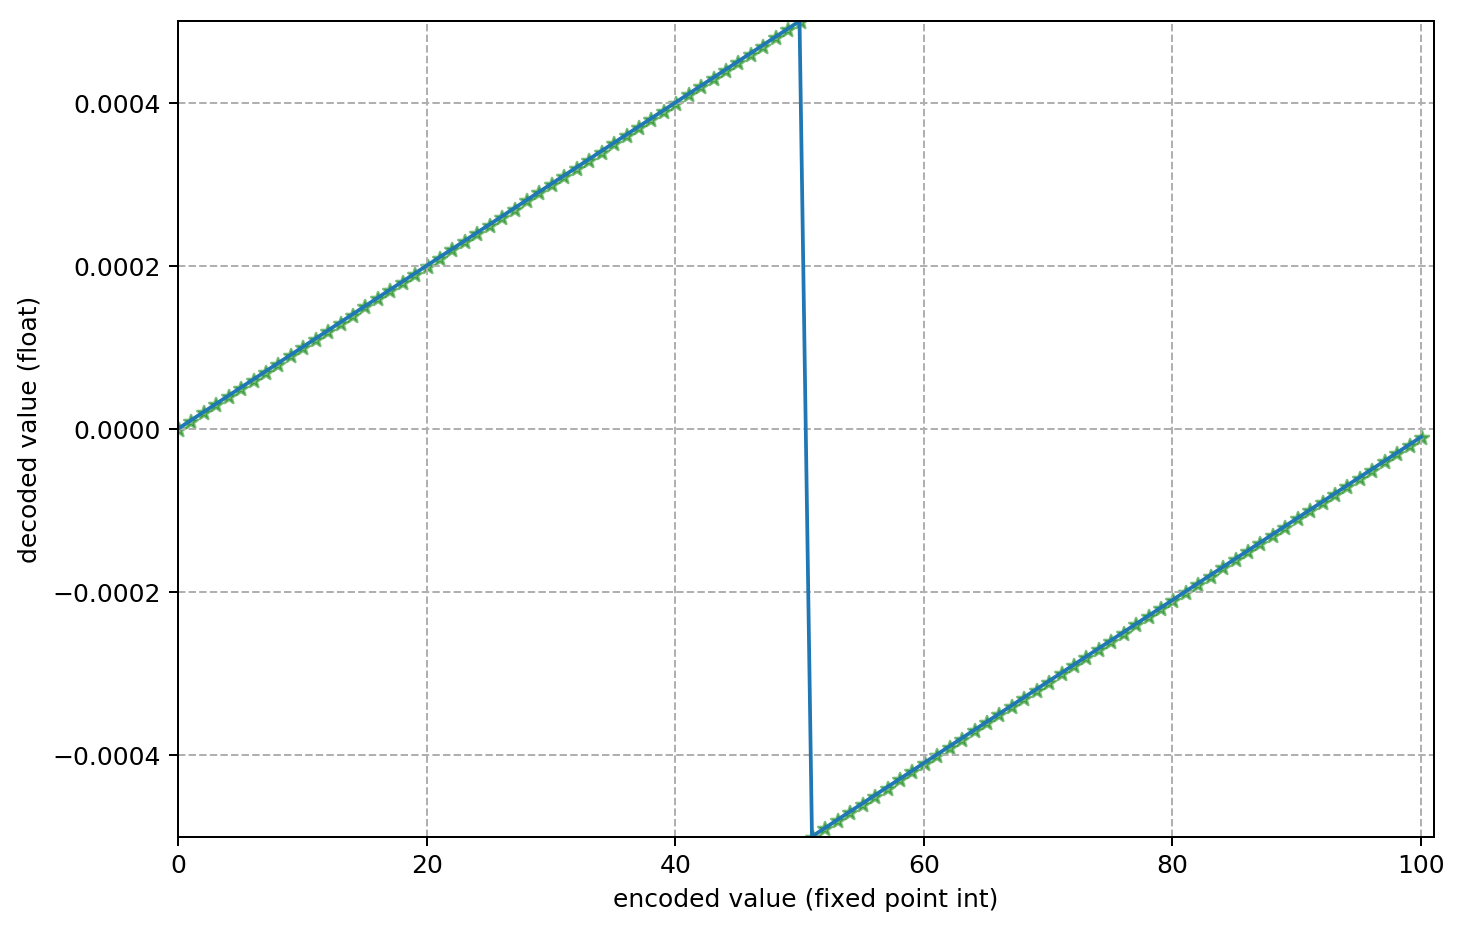

In [28]:
p = 101
precision_fractional = 5
base = 10

x_, y_ = [], []
for x in range(0, p, 1):
    x_.append(x)
    y_.append(decode(x, base, precision_fractional, p))

import matplotlib.pyplot as plt
plt.clf()
fig=plt.figure(dpi = 180, figsize=(9,6))

plt.scatter(x_, y_, c="g", alpha=0.5, marker=r'$\bigstar$', label="")
plt.plot(x_, y_)
plt.xlabel("encoded value (fixed point int)")
plt.ylabel("decoded value (float)")
plt.grid(linestyle='--')
plt.xlim((0, p))
plt.ylim((-decode(p//2, base, precision_fractional, p), decode(p//2, base, precision_fractional, p)))
plt.show()

See that from 0 to p//2 numbers are positive and increasing. From p//2 going up, the numer turns to negative and starts increasing (that's the modulo operation acting on the upscaled value). The maximum value representable is given by

$$int(\frac{p}{2})\times \frac{1}{base^{prec}}$$

In [29]:
p = 101
base = 10

for precision_fractional in range(5, 10):
    x = (p//2)/(base**precision_fractional)
    print(f"prec={precision_fractional}, max_val={x}")

prec=5, max_val=0.0005
prec=6, max_val=5e-05
prec=7, max_val=5e-06
prec=8, max_val=5e-07
prec=9, max_val=5e-08


As we increase the precision and mantain the prime number the maximum value get smaller so it'd be more difficult to represent large values here. Let's see if we increase the prime number.

<Figure size 432x288 with 0 Axes>

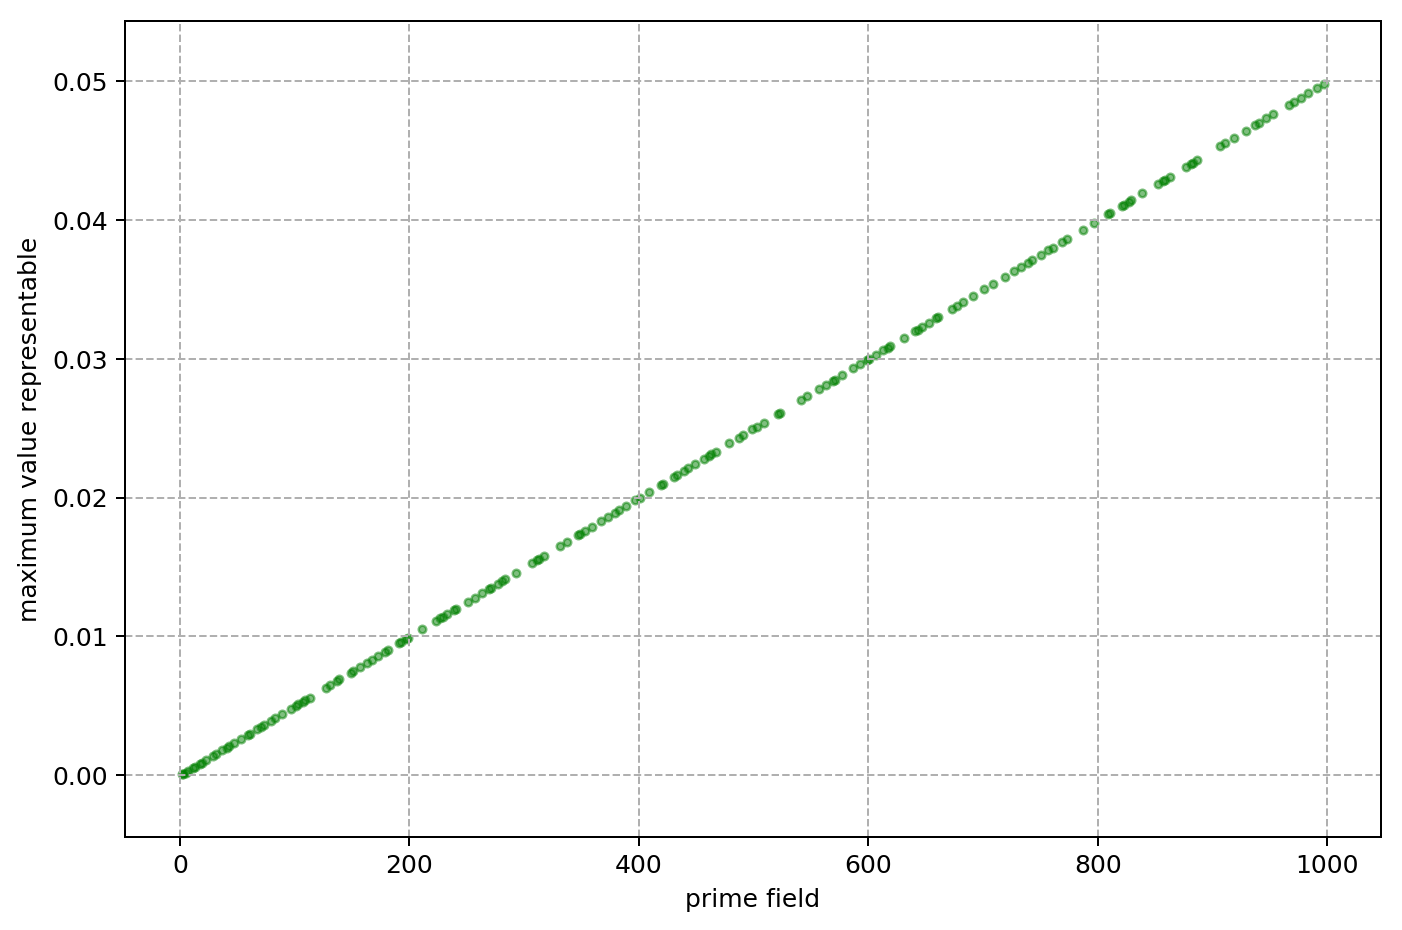

In [30]:
from crypt import PrimesSieveEratosthenes

primes = list(PrimesSieveEratosthenes(1000))
base = 10
precision_fractional = 4

y_ = []
for p in primes:
    y_.append((p//2)/(base**precision_fractional))

import matplotlib.pyplot as plt
plt.clf()
fig=plt.figure(dpi = 180, figsize=(9,6))

plt.scatter(primes, y_, c="g", alpha=0.5, marker=".", label="")
#plt.plot(primes, y_)
plt.xlabel("prime field")
plt.ylabel("maximum value representable")
plt.grid(linestyle='--')
#plt.xlim((0, p))
#plt.ylim((-decode(p//2, base, precision_fractional, p), decode(p//2, base, precision_fractional, p)))
plt.show()

So to increase the representative max floating point we have to increase the field. In practice we will use fields of 128 bits or even larger. 

In [31]:
from crypt import GeneratePrimeGeneratorPair

precision_fractional = 12
base = 10

seed(1)
bits = 128
p, _ = GeneratePrimeGeneratorPair(bits)

max_val = (p//2)/(base**precision_fractional)
print(f"Maximum value of floating point to encode: {max_val}")

Maximum value of floating point to encode: 9.755323798645494e+25


In [32]:
def encode(r: float, base: int, precision_fractional: int, p: int):
    assert p > base**precision, "prime field must be larger than base**precision"
    upscaled = int(r*base**precision_fractional)
    if abs(r) < (p//2)/(base**precision_fractional):
        return upscaled%p
    else:
        return None

def decode(e: int, base: int, precision_fractional: int, p: int):
    upscaled = e if e <= p//2 else e - p
    return upscaled/(base**precision_fractional)

In [33]:
f = 97545678901234567890123456
f = 0.000000000001

print(f"floating point:\n\t{f}")
max_val = (p//2)/(base**precision_fractional)
print(f"field with prime:\n\t{p}")
print(f"Maximum value of floating point to encode:\n\t{max_val}")
enc = encode(f, base , precision_fractional, p)
print(f"encoded float:\n\t{enc}")
dec = decode(enc, base , precision_fractional, p)
print(f"decoded back:\n\t{dec}")

floating point:
	1e-12
field with prime:
	195106475972909888959935531537923334587
Maximum value of floating point to encode:
	9.755323798645494e+25
encoded float:
	1
decoded back:
	1e-12


In [34]:
# This cannot be decoded, is equal to maxium (p//2)
f = 9.755323798645494e+25

# This can be decoded
f = 9.755323798645492e+25

print(f"floating point:\n\t{f}")
max_val = decode(p//2, base , precision_fractional, p)
print(f"field with prime:\n\t{p}")
print(f"Maximum value of floating point to encode:\n\t{max_val}")
enc = encode(f, base , precision_fractional, p)
print(f"encoded float:\n\t{enc}")
dec = decode(enc, base , precision_fractional, p)
print(f"decoded back:\n\t{dec}")

floating point:
	9.755323798645492e+25
field with prime:
	195106475972909888959935531537923334587
Maximum value of floating point to encode:
	9.755323798645494e+25
encoded float:
	97553237986454912364621109843122454528
decoded back:
	9.755323798645492e+25


## Sums in fixed point numbers 

Let's compute sum of fixed points and recover back the result. Fix again precision and base:

In [35]:
precision_fractional = 4
base = 10

seed(2)
bits = 128
p, _ = GeneratePrimeGeneratorPair(bits)

max_val = (p//2)/(base**precision_fractional)
print(f"Maximum value of floating point to encode: {max_val}")
print("{:.55f}".format(1.5))
print(f"Precision: {base**(-precision_fractional)}")
print(f"field with prime: {p}")

Maximum value of floating point to encode: 1.5087099345061842e+34
1.5000000000000000000000000000000000000000000000000000000
Precision: 0.0001
field with prime: 301741986901236859315307879546689319353


It may be the case that we overflow and specifically we want to be able to represent sum of large numbers. Say our maximum number is $x$, what is the field that we need so that we are able to represent $x$?

In [36]:
from crypt import RandomPrime

# Want to find a field that allows us to encode x given a certain base and precision
x = 1.123456789e15
seed(2)

# generate a random prime of certain number of bits and test if it can generate the large float we want
# stop when the max_val is larger than our float
for i in range(4, 10):
    bits = 2**i
    p = RandomPrime(bits, 100)
    max_val = (p//2)/(base**precision_fractional)
    if max_val>x:
        break
        
assert max_val>x, "cannot represent max value"

print(f"float to encode:\n\t{x}")
print(f"Prime number found:\n\t{p}")
print(f"maximum value for float above:\n\t{max_val}")

enc = encode(x, base , precision_fractional, p)
print(f"encoded float:\n\t{enc}")
dec = decode(enc, base , precision_fractional, p)
print(f"decoded back:\n\t{dec}")

float to encode:
	1123456789000000.0
Prime number found:
	216722917179033271936309953812340326257
maximum value for float above:
	1.0836145858951663e+34
encoded float:
	11234567889999998976
decoded back:
	1123456788999999.9


Let's code the above in one function

In [37]:
def find_prime_maxfloat(x, base, precision_fractional):
    for i in range(4, 10):
        bits = 2**i
        p = RandomPrime(bits, 100)
        max_val = (p//2)/(base**precision_fractional)
        if max_val>x:
            return p
    return None

In [38]:
from random import uniform

v = 10**10 #max value for an individual
summands = 1000
p = find_prime_maxfloat(summands*v, base, precision_fractional) # find prime for max value of sum
max_val = (p//2)/(base**precision_fractional)

rdm_vals = [uniform(-v, v) for _ in range(5)]
enc_vals = [encode(val, base , precision_fractional, p) for val in rdm_vals]
dec_vals = [decode(val, base , precision_fractional, p) for val in enc_vals]

print(f"Maximum value for each summand:\n\t{v}")
print(f"Number of summands:\n\t{summands}")
print(f"Maximum value for the sum:\n\t{max_val}")

encoded_sum = sum(enc_vals)%p
decoded_sum = decode(encoded_sum, base, precision_fractional, p)
print(f"Encoded sum:\n\t{encoded_sum}")
print(f"Decoded sum:\n\t{decoded_sum}")
print(f"Actual sum:\n\t{sum(rdm_vals)}")

Maximum value for each summand:
	10000000000
Number of summands:
	1000
Maximum value for the sum:
	489842509034556.4
Encoded sum:
	6585635921080
Decoded sum:
	658563592.108
Actual sum:
	658563592.1079788
